In [1]:
# Importing libraries
import numpy as np   
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Importing dataset
house = pd.read_csv("C:/Users/DEVIKA/OneDrive/Documents/Data Science/Database/House Price .csv")
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [2]:
# EDA
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house.shape

(1460, 81)

In [5]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
house.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
null_values = house.isnull().sum()
null_values = null_values[null_values>0]
print(null_values)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [8]:
house.drop('Id',axis = 1) # Dropping Id

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [9]:
house = house.drop('Alley', axis=1) # Dropping features that have null values above 600

In [10]:
house = house.drop('PoolQC', axis=1)

In [11]:
house = house.drop('FireplaceQu', axis=1)

In [12]:
house = house.drop('MasVnrType', axis=1)

In [13]:
house = house.drop('MiscFeature', axis=1)

In [14]:
house = house.drop('Fence', axis=1)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\3214631260.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house['LotFrontage']) # Distribution plot of 'LotFrontage'


<Axes: xlabel='LotFrontage', ylabel='Density'>

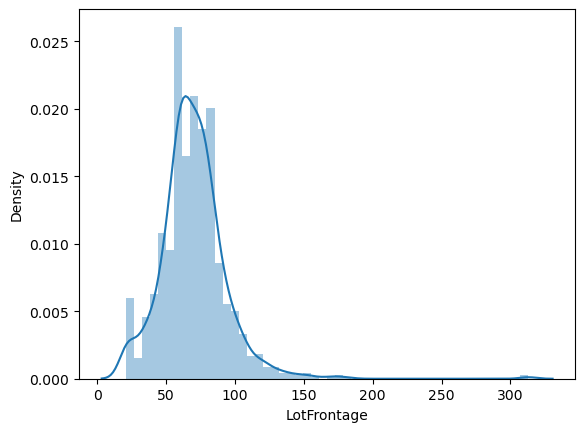

In [15]:
sns.distplot(house['LotFrontage']) # Distribution plot of 'LotFrontage'

In [16]:
house['LotFrontage'].fillna(house['LotFrontage'].median(), inplace=True) # Applying median to fill the null values

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\1257955508.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['LotFrontage'].fillna(house['LotFrontage'].median(), inplace=True) # Applying median to fill the null values


In [17]:
house.select_dtypes(include='object') # To check features that has object datatype

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\1232793627.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house['MasVnrArea'])


<Axes: xlabel='MasVnrArea', ylabel='Density'>

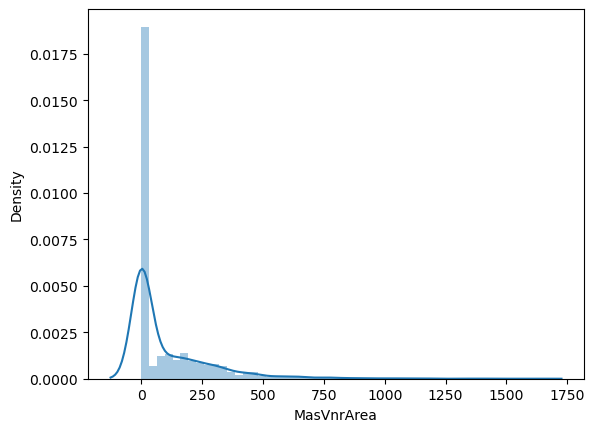

In [18]:
# Distribution plot
sns.distplot(house['MasVnrArea'])

In [19]:
house['MasVnrArea'].fillna(house['MasVnrArea'].median(), inplace=True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\4154675174.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['MasVnrArea'].fillna(house['MasVnrArea'].median(), inplace=True)


In [20]:
# To  objects to integers
house['BsmtQual'].value_counts()  # To check the no of objects+

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [21]:
# Replacing objects
house.replace({'BsmtQual':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3}}, inplace = True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\915465668.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'BsmtQual':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3}}, inplace = True)


C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\2262678348.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house['BsmtQual']) # Distribution plot


<Axes: xlabel='BsmtQual', ylabel='Density'>

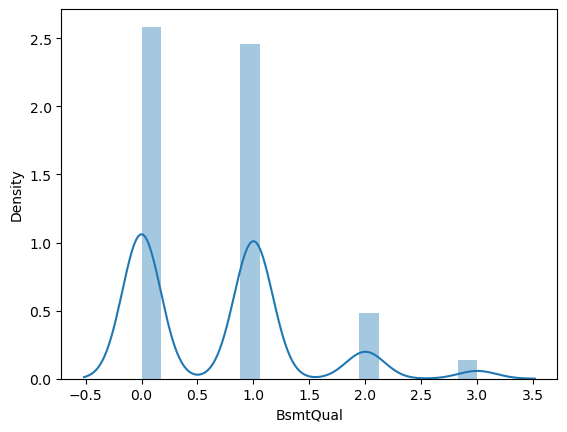

In [22]:
sns.distplot(house['BsmtQual']) # Distribution plot

In [23]:
house['BsmtQual'].fillna(house['BsmtQual'].mode()[0], inplace=True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\3860657353.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['BsmtQual'].fillna(house['BsmtQual'].mode()[0], inplace=True)


In [24]:
# To  objects to integers
house['BsmtCond'].value_counts()  # To check the no of objects

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [25]:
# Replacing objects
house.replace({'BsmtCond':{'TA':0, 'Gd':1, 'Fa':2, 'Po':3}}, inplace = True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\796464920.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'BsmtCond':{'TA':0, 'Gd':1, 'Fa':2, 'Po':3}}, inplace = True)


C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\4154319950.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house['BsmtCond']) # Distribution plot


<Axes: xlabel='BsmtCond', ylabel='Density'>

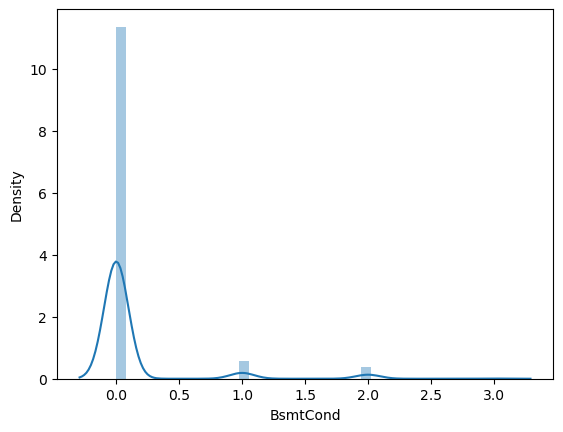

In [26]:
sns.distplot(house['BsmtCond']) # Distribution plot

In [27]:
house['BsmtCond'].fillna(house['BsmtCond'].mode()[0], inplace =True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\4004635537.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['BsmtCond'].fillna(house['BsmtCond'].mode()[0], inplace =True)


In [28]:
# To objects to integers
house['BsmtExposure'].value_counts()

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [29]:
house.replace({'BsmtExposure':{'No':0, 'Av':1, 'Gd':2, 'Mn':3}}, inplace = True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\87558394.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'BsmtExposure':{'No':0, 'Av':1, 'Gd':2, 'Mn':3}}, inplace = True)


C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\3942279393.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house['BsmtExposure'])


<Axes: xlabel='BsmtExposure', ylabel='Density'>

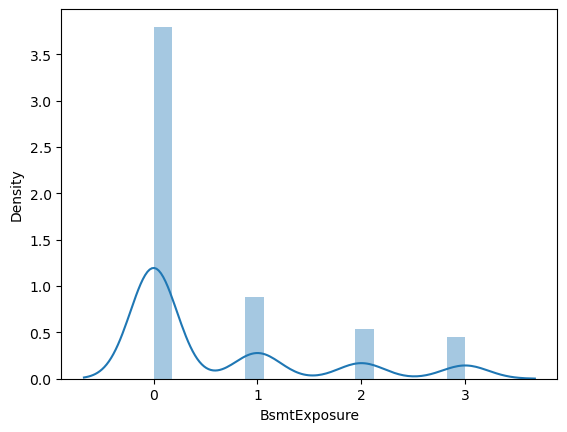

In [30]:
sns.distplot(house['BsmtExposure'])

In [31]:
house['BsmtExposure'].fillna(house['BsmtExposure'].mode()[0], inplace=True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\757485591.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['BsmtExposure'].fillna(house['BsmtExposure'].mode()[0], inplace=True)


In [32]:
# To objects to integers
house['BsmtFinType1'].value_counts()

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

In [33]:
house.replace({'BsmtFinType1':{'Unf':0, 'GLQ':1, 'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ':5}}, inplace = True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\503454818.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'BsmtFinType1':{'Unf':0, 'GLQ':1, 'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ':5}}, inplace = True)


C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\2284663356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house['BsmtFinType1'])


<Axes: xlabel='BsmtFinType1', ylabel='Density'>

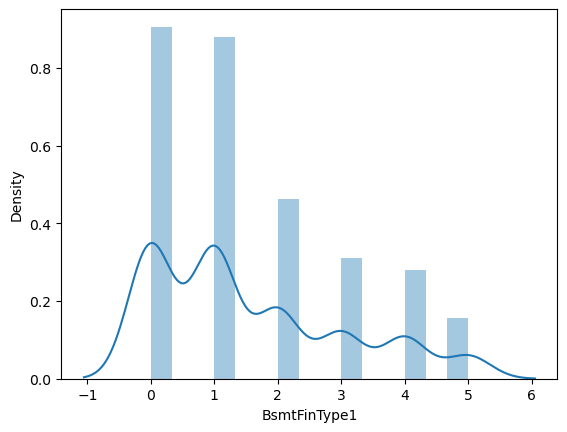

In [34]:
sns.distplot(house['BsmtFinType1'])

In [35]:
house['BsmtFinType1'].fillna(house['BsmtFinType1'].mode()[0], inplace =True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\2115056094.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['BsmtFinType1'].fillna(house['BsmtFinType1'].mode()[0], inplace =True)


In [36]:
# To objects to integers
house['BsmtFinType2'].value_counts()

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [37]:
house.replace({'BsmtFinType2':{'Unf':0, 'Rec':1, 'LwQ':2, 'BLQ':3, 'ALQ':4, 'GLQ':5}}, inplace = True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\2763351836.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'BsmtFinType2':{'Unf':0, 'Rec':1, 'LwQ':2, 'BLQ':3, 'ALQ':4, 'GLQ':5}}, inplace = True)


C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\4124428907.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house['BsmtFinType2'])


<Axes: xlabel='BsmtFinType2', ylabel='Density'>

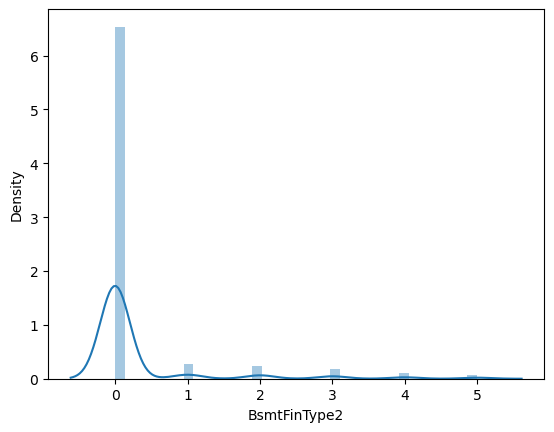

In [38]:
sns.distplot(house['BsmtFinType2'])

In [39]:
house['BsmtFinType2'].fillna(house['BsmtFinType2'].mode()[0], inplace =True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\2962837253.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['BsmtFinType2'].fillna(house['BsmtFinType2'].mode()[0], inplace =True)


In [40]:
# To objects to integers
house['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [41]:
house.replace({'Electrical':{'SBrkr':0, 'FuseA':1, 'FuseF':2, 'FuseP':3, 'Mix':4}}, inplace = True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\3571339758.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'Electrical':{'SBrkr':0, 'FuseA':1, 'FuseF':2, 'FuseP':3, 'Mix':4}}, inplace = True)


C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\3239800624.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house['Electrical'])


<Axes: xlabel='Electrical', ylabel='Density'>

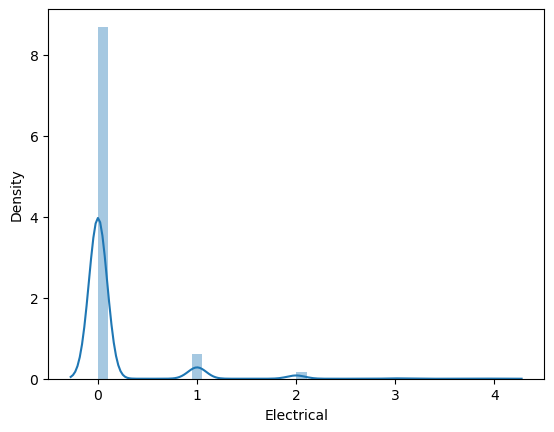

In [42]:
sns.distplot(house['Electrical'])

In [43]:
house['Electrical'].fillna(house['Electrical'].mode()[0], inplace =True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\320720008.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['Electrical'].fillna(house['Electrical'].mode()[0], inplace =True)


In [44]:
# To objects to integers
house['GarageType'].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [45]:
house.replace({'GarageType':{'Attchd':0, 'Detchd':1, 'BuiltIn':2, 'Basment':3, 'CarPort':4, '2Types':5}}, inplace = True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\803136405.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'GarageType':{'Attchd':0, 'Detchd':1, 'BuiltIn':2, 'Basment':3, 'CarPort':4, '2Types':5}}, inplace = True)


C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\592303578.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house['GarageType'])


<Axes: xlabel='GarageType', ylabel='Density'>

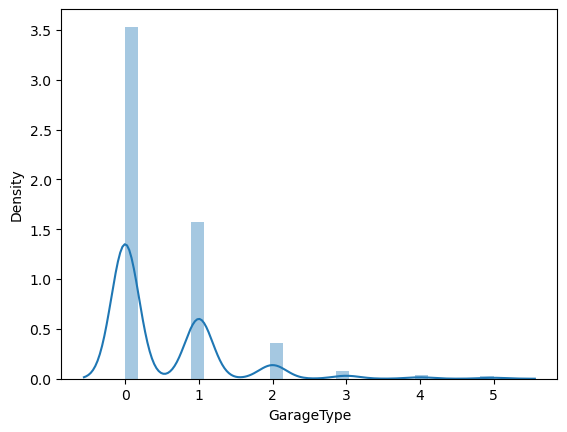

In [46]:
sns.distplot(house['GarageType'])

In [47]:
house['GarageType'].fillna(house['GarageType'].mode()[0], inplace=True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\2076838115.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['GarageType'].fillna(house['GarageType'].mode()[0], inplace=True)


In [48]:
# To objects to integers
house['GarageYrBlt'].value_counts() # Its already integers

GarageYrBlt
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: count, Length: 97, dtype: int64

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\776803304.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house['GarageYrBlt'])


<Axes: xlabel='GarageYrBlt', ylabel='Density'>

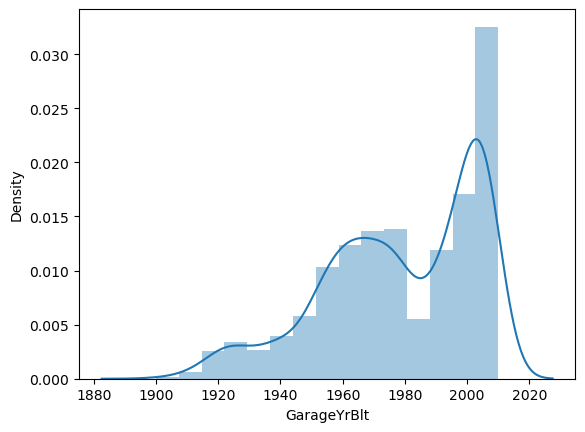

In [49]:
sns.distplot(house['GarageYrBlt'])

In [50]:
house['GarageYrBlt'].fillna(house['GarageYrBlt'].median(), inplace =True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\2321538621.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['GarageYrBlt'].fillna(house['GarageYrBlt'].median(), inplace =True)


In [51]:
# To objects to integers
house['GarageFinish'].value_counts()

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

In [52]:
house.replace({'GarageFinish':{'Unf':0, 'RFn':1, 'Fin':2}}, inplace = True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\946454879.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'GarageFinish':{'Unf':0, 'RFn':1, 'Fin':2}}, inplace = True)


C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\1065677755.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house['GarageFinish'])


<Axes: xlabel='GarageFinish', ylabel='Density'>

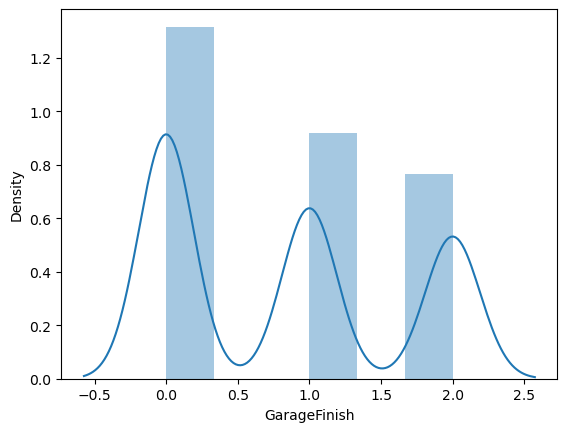

In [53]:
sns.distplot(house['GarageFinish'])

In [54]:
house['GarageFinish'].fillna(house['GarageFinish'].mode()[0], inplace =True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\4201900666.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['GarageFinish'].fillna(house['GarageFinish'].mode()[0], inplace =True)


In [55]:
# To objects to integers
house['GarageQual'].value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [56]:
house.replace({'GarageQual':{'TA':0, 'Fa':1, 'Gd':2, 'Ex':3, 'Po':4}}, inplace = True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\1994644612.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'GarageQual':{'TA':0, 'Fa':1, 'Gd':2, 'Ex':3, 'Po':4}}, inplace = True)


C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\1239912323.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house['GarageQual'])


<Axes: xlabel='GarageQual', ylabel='Density'>

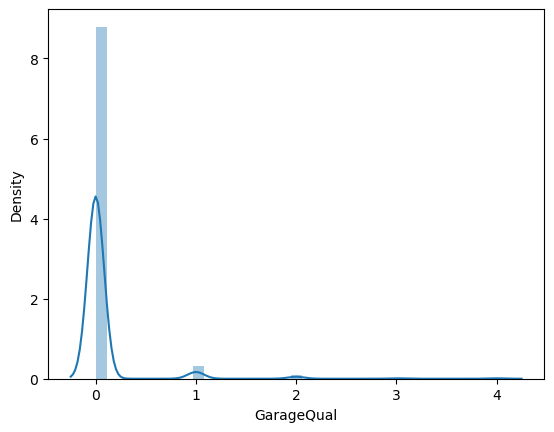

In [57]:
sns.distplot(house['GarageQual'])

In [58]:
house['GarageQual'].fillna(house['GarageQual'].mode()[0], inplace =True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\1954792353.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['GarageQual'].fillna(house['GarageQual'].mode()[0], inplace =True)


In [59]:
# To objects to integers
house['GarageCond'].value_counts()

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

In [60]:
house.replace({'GarageCond':{'TA':0, 'Fa':1, 'Gd':2, 'Po':3, 'Ex':4}}, inplace = True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\2182897959.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'GarageCond':{'TA':0, 'Fa':1, 'Gd':2, 'Po':3, 'Ex':4}}, inplace = True)


C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\3010517372.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house['GarageCond'])


<Axes: xlabel='GarageCond', ylabel='Density'>

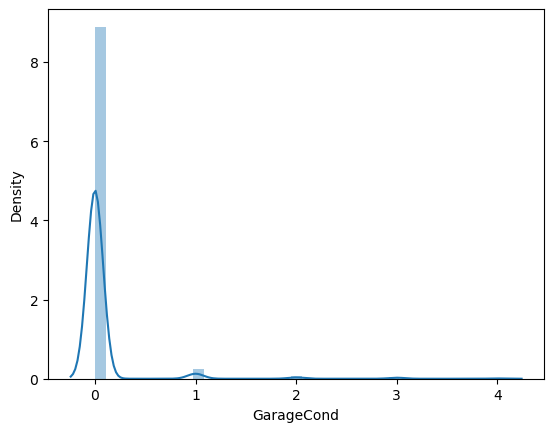

In [61]:
sns.distplot(house['GarageCond'])

In [62]:
house['GarageCond'].fillna(house['GarageCond'].mode()[0], inplace=True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\345955507.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house['GarageCond'].fillna(house['GarageCond'].mode()[0], inplace=True)


In [63]:
# To check null values
null_values = house.isnull().sum()
null_values = null_values[null_values>0]
print(null_values)

Series([], dtype: int64)


In [64]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [65]:
# To List features that have object datatype
list(house.select_dtypes(include='object').columns)

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [66]:
# To change objects to integers
house['Street'].value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [67]:
house.replace({'Street':{'Pave':0, 'Grvl':1}}, inplace = True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\242513033.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'Street':{'Pave':0, 'Grvl':1}}, inplace = True)


In [68]:
house['LotShape'].value_counts()

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

In [69]:
house.replace({'LotShape':{'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3}}, inplace = True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\2293736370.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'LotShape':{'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3}}, inplace = True)


In [70]:
house['LandContour'].value_counts()

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

In [71]:
house.replace({'LandContour':{'Lvl':0, 'Bnk':1, 'HLS':2, 'Low':3}}, inplace = True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\2429164042.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'LandContour':{'Lvl':0, 'Bnk':1, 'HLS':2, 'Low':3}}, inplace = True)


In [72]:
house['Utilities'].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [73]:
house.replace({'Utilities':{'AllPub':0, 'NoSeWa':1}}, inplace = True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\2108177440.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'Utilities':{'AllPub':0, 'NoSeWa':1}}, inplace = True)


In [74]:
house['LotConfig'].value_counts()

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

In [75]:
house.replace({'LotConfig':{'Inside':0, 'Corner':1, 'CulDSac':2, 'FR2':3, 'FR3':4}}, inplace = True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\1349204549.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'LotConfig':{'Inside':0, 'Corner':1, 'CulDSac':2, 'FR2':3, 'FR3':4}}, inplace = True)


In [76]:
house['LandSlope'].value_counts()

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

In [77]:
house.replace({'LandSlope':{'Gtl':0, 'Mod':1, 'Sev':2}}, inplace = True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\2523298526.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'LandSlope':{'Gtl':0, 'Mod':1, 'Sev':2}}, inplace = True)


In [78]:
house['Neighborhood'].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [79]:
house.replace({'Neighborhood':{'NAmes':0, 'CollgCr':1, 'OldTown':2, 'Edwards':3, 'Somerst':4, 'Gilbert':5, 'NridgHt':6, 'Sawyer':7, 'NWAmes':8, 'SawyerW':9, 'BrkSide':10, 'Crawfor':11, 'Mitchel':12, 'NoRidge':13, 'Timber':14, 'IDOTRR':15, 'ClearCr':16, 'StoneBr':17, 'SWISU':18, 'MeadowV':19, 'Blmngtn':20, 'BrDale':21, 'Veenker':22, 'NPkVill':23, 'Blueste':24}}, inplace = True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\1728271898.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'Neighborhood':{'NAmes':0, 'CollgCr':1, 'OldTown':2, 'Edwards':3, 'Somerst':4, 'Gilbert':5, 'NridgHt':6, 'Sawyer':7, 'NWAmes':8, 'SawyerW':9, 'BrkSide':10, 'Crawfor':11, 'Mitchel':12, 'NoRidge':13, 'Timber':14, 'IDOTRR':15, 'ClearCr':16, 'StoneBr':17, 'SWISU':18, 'MeadowV':19, 'Blmngtn':20, 'BrDale':21, 'Veenker':22, 'NPkVill':23, 'Blueste':24}}, inplace = True)


In [80]:
house['Condition1'].value_counts()

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

In [81]:
house.replace({'Condition1':{'Norm':0, 'Feedr':1, 'Artery':2, 'RRAn':3, 'PosN':4, 'RRAe':5, 'PosA':6, 'RRNn':7, 'RRNe':8}}, inplace=True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\555297982.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'Condition1':{'Norm':0, 'Feedr':1, 'Artery':2, 'RRAn':3, 'PosN':4, 'RRAe':5, 'PosA':6, 'RRNn':7, 'RRNe':8}}, inplace=True)


In [82]:
house['Condition2'].value_counts()

Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64

In [83]:
house.replace({'Condition2':{'Norm':0, 'Feedr':1, 'Artery':2, 'RRNn':3, 'PosN':4, 'RRAe':5, 'PosA':6, 'RRAn':7, 'RRAe':8}}, inplace=True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\3482957569.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'Condition2':{'Norm':0, 'Feedr':1, 'Artery':2, 'RRNn':3, 'PosN':4, 'RRAe':5, 'PosA':6, 'RRAn':7, 'RRAe':8}}, inplace=True)


In [84]:
house['BldgType'].value_counts()

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

In [85]:
house.replace({'BldgType':{'1Fam':0, 'TwnhsE':1, 'Duplex':2, 'Twnhs':3, '2fmCon':4}}, inplace=True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\2558111672.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'BldgType':{'1Fam':0, 'TwnhsE':1, 'Duplex':2, 'Twnhs':3, '2fmCon':4}}, inplace=True)


In [86]:
house['HouseStyle'].value_counts()

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

In [87]:
house.replace({'HouseStyle':{'1Story':0, '2Story':1, '1.5Fin':2, 'SLvl':3, 'SFoyer':4, '1.5Unf':5, '2.5Unf':6, '2.5Fin':7}}, inplace=True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\604751564.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'HouseStyle':{'1Story':0, '2Story':1, '1.5Fin':2, 'SLvl':3, 'SFoyer':4, '1.5Unf':5, '2.5Unf':6, '2.5Fin':7}}, inplace=True)


In [88]:
house['RoofStyle'].value_counts()

RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64

In [89]:
house.replace({'RoofStyle':{'Gable':0, 'Hip':1, 'Flat':2, 'Gambrel':3, 'Mansard':4, 'Shed':5}}, inplace=True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\2002082478.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'RoofStyle':{'Gable':0, 'Hip':1, 'Flat':2, 'Gambrel':3, 'Mansard':4, 'Shed':5}}, inplace=True)


In [90]:
house['RoofMatl'].value_counts()

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

In [91]:
house.replace({'RoofMatl':{'CompShg':0, 'Tar&Grv':1, 'WdShngl':2, 'WdShake':3, 'Metal':4, 'Membran':5, 'Roll':6, 'ClyTile':7}}, inplace=True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\3216252450.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'RoofMatl':{'CompShg':0, 'Tar&Grv':1, 'WdShngl':2, 'WdShake':3, 'Metal':4, 'Membran':5, 'Roll':6, 'ClyTile':7}}, inplace=True)


In [92]:
house['Exterior1st'].value_counts()

Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64

In [93]:
house.replace({'Exterior1st':{'VinylSd':0, 'HdBoard':1, 'MetalSd':2, 'Wd Sdng':3, 'Plywood':4, 'CemntBd':5, 'BrkFace':6, 'WdShing':7, 'Stucco':8, 'AsbShng':9, 'BrkComm':10, 'Stone':11, 'AsphShn':12, 'ImStucc':13, 'CBlock':14}}, inplace=True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\3305901001.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'Exterior1st':{'VinylSd':0, 'HdBoard':1, 'MetalSd':2, 'Wd Sdng':3, 'Plywood':4, 'CemntBd':5, 'BrkFace':6, 'WdShing':7, 'Stucco':8, 'AsbShng':9, 'BrkComm':10, 'Stone':11, 'AsphShn':12, 'ImStucc':13, 'CBlock':14}}, inplace=True)


In [94]:
house['Exterior2nd'].value_counts()

Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64

In [95]:
house.replace({'Exterior2nd':{'VinylSd':0, 'MetalSd':1, 'HdBoard':2, 'Wd Sdng':3, 'Plywood':4, 'CmentBd':5, 'Wd Shng':6, 'Stucco':7, 'BrkFace':8, 'AsbShng':9, 'ImStucc':10, 'Brk Cmn':11, 'Stone':12, 'AsphShn':13, 'Other':14, 'CBlock':15}}, inplace=True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\779348913.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'Exterior2nd':{'VinylSd':0, 'MetalSd':1, 'HdBoard':2, 'Wd Sdng':3, 'Plywood':4, 'CmentBd':5, 'Wd Shng':6, 'Stucco':7, 'BrkFace':8, 'AsbShng':9, 'ImStucc':10, 'Brk Cmn':11, 'Stone':12, 'AsphShn':13, 'Other':14, 'CBlock':15}}, inplace=True)


In [96]:
house['Exterior2nd'].value_counts()

Exterior2nd
0     504
1     214
2     207
3     197
4     142
5      60
6      38
7      26
8      25
9      20
10     10
11      7
12      5
13      3
14      1
15      1
Name: count, dtype: int64

In [97]:
house['ExterQual'].value_counts()

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

In [98]:
house.replace({'ExterQual':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3}},inplace=True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\4099559749.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'ExterQual':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3}},inplace=True)


In [99]:
house['ExterCond'].value_counts()

ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64

In [100]:
house.replace({'ExterCond':{'TA':0, 'Gd':1, 'Fa':2, 'Ex':3, 'Po':4}},inplace=True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\2892565706.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'ExterCond':{'TA':0, 'Gd':1, 'Fa':2, 'Ex':3, 'Po':4}},inplace=True)


In [101]:
house['Foundation'].value_counts()

Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64

In [102]:
house.replace({'Foundation':{'PConc':0, 'CBlock':1, 'BrkTil':2, 'Slab':3, 'Stone':4, 'Wood':5}},inplace=True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\2005452054.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'Foundation':{'PConc':0, 'CBlock':1, 'BrkTil':2, 'Slab':3, 'Stone':4, 'Wood':5}},inplace=True)


In [103]:
house['Heating'].value_counts()

Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

In [104]:
house.replace({'Heating':{'GasA':0, 'GasW':1, 'Grav':2, 'Wall':3, 'OthW':4, 'Floor':5}}, inplace=True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\43260639.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'Heating':{'GasA':0, 'GasW':1, 'Grav':2, 'Wall':3, 'OthW':4, 'Floor':5}}, inplace=True)


In [105]:
house['HeatingQC'].value_counts()

HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64

In [106]:
house.replace({'HeatingQC':{'Ex':0, 'TA':1, 'Gd':2, 'Fa':3, 'Po':4}}, inplace=True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\214173522.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'HeatingQC':{'Ex':0, 'TA':1, 'Gd':2, 'Fa':3, 'Po':4}}, inplace=True)


In [107]:
house['CentralAir'].value_counts()

CentralAir
Y    1365
N      95
Name: count, dtype: int64

In [108]:
house.replace({'CentralAir':{'Y':0, 'N':1}}, inplace=True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\1817338394.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'CentralAir':{'Y':0, 'N':1}}, inplace=True)


In [109]:
house['KitchenQual'].value_counts()

KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64

In [110]:
house.replace({'KitchenQual':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3}}, inplace=True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\2107606055.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'KitchenQual':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3}}, inplace=True)


In [111]:
house['Functional'].value_counts()

Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64

In [112]:
house.replace({'Functional':{'Typ':0, 'Min2':1, 'Min1':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6}}, inplace=True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\744162659.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'Functional':{'Typ':0, 'Min2':1, 'Min1':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6}}, inplace=True)


In [113]:
house['PavedDrive'].value_counts()

PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64

In [114]:
house.replace({'PavedDrive':{'Y':0, 'N':1, 'P':2}}, inplace=True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\3169847868.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'PavedDrive':{'Y':0, 'N':1, 'P':2}}, inplace=True)


In [115]:
house['SaleType'].value_counts()

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

In [116]:
house.replace({'SaleType':{'WD':0, 'New':1, 'COD':2, 'ConLD':3, 'ConLI':4, 'ConLw':5, 'CWD':6, 'Oth':7, 'Con':8}}, inplace=True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\1213846611.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'SaleType':{'WD':0, 'New':1, 'COD':2, 'ConLD':3, 'ConLI':4, 'ConLw':5, 'CWD':6, 'Oth':7, 'Con':8}}, inplace=True)


In [117]:
house['SaleCondition'].value_counts()

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

In [118]:
house.replace({'SaleCondition':{'Normal':0, 'Partial':1, 'Abnorml':2, 'Family':3, 'Alloca':4, 'AdjLand':5}}, inplace=True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\2483277991.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'SaleCondition':{'Normal':0, 'Partial':1, 'Abnorml':2, 'Family':3, 'Alloca':4, 'AdjLand':5}}, inplace=True)


In [122]:
house['MSZoning'].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [130]:
house.replace({'MSZoning':{'RL':0, 'RM':1, 'FV':2, 'RH':3, 'C (all)':4}}, inplace=True)

C:\Users\DEVIKA\AppData\Local\Temp\ipykernel_8940\1654591334.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house.replace({'MSZoning':{'RL':0, 'RM':1, 'FV':2, 'RH':3, 'C (all)':4}}, inplace=True)


In [131]:
# To list all the null values
null_values = house.isnull().sum()
null_values = null_values[null_values>0]
print(null_values)

Series([], dtype: int64)


In [132]:
# To List features that have object datatype
list(house.select_dtypes(include='object').columns)

[]

In [133]:
#Correlation
correlation = house.corr()
correlation

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.011156,-0.021713,-0.009921,-0.033226,-0.008916,-0.024071,0.008332,0.013324,-0.014160,...,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.017218,-0.016834,-0.021917
MSSubClass,0.011156,1.000000,0.280306,-0.356718,-0.139781,0.024969,-0.115361,-0.025090,-0.022844,-0.037573,...,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,0.016085,0.004788,-0.084284
MSZoning,-0.021713,0.280306,1.000000,-0.239076,-0.164093,0.115502,-0.188404,0.008574,-0.011701,-0.082953,...,0.124006,-0.046646,-0.063773,-0.030701,-0.017745,0.030967,-0.002833,0.073850,0.099049,-0.183642
LotFrontage,-0.009921,-0.356718,-0.239076,1.000000,0.304522,0.037349,0.191420,0.084287,-0.001027,0.046862,...,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.010798,0.018490,0.334771
LotArea,-0.033226,-0.139781,-0.164093,0.304522,1.000000,0.197131,0.315484,0.339008,0.010123,0.131099,...,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,-0.013285,-0.016193,0.263843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.021172,-0.013585,0.030967,0.010451,0.001205,-0.003690,0.026617,0.053402,-0.051552,-0.024821,...,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,0.042867,0.033540,0.046432
YrSold,0.000712,-0.021407,-0.002833,0.006380,-0.014261,0.025043,-0.037391,-0.025586,0.023353,0.011358,...,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.020916,-0.095609,-0.028923
SaleType,-0.017218,0.016085,0.073850,0.010798,-0.013285,0.021569,-0.000301,-0.020351,0.058278,0.011157,...,-0.013426,-0.002435,-0.029667,-0.009903,-0.014184,0.042867,-0.020916,1.000000,0.232602,0.081115
SaleCondition,-0.016834,0.004788,0.099049,0.018490,-0.016193,0.029729,-0.030278,0.027309,0.057619,-0.007482,...,0.006516,-0.003393,-0.014412,0.095828,-0.031561,0.033540,-0.095609,0.232602,1.000000,0.004591


<Axes: >

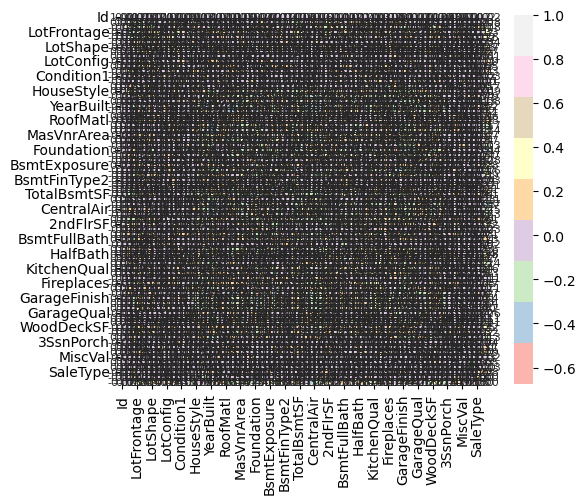

In [134]:
# Plotting correlation using heatmap
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8},cmap='Pastel1')

In [135]:
# Dropping the output that we want to predict and storing the rest in x
x = house.drop('SalePrice', axis=1)
x

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,0,65.0,8450,0,0,0,0,0,...,61,0,0,0,0,0,2,2008,0,0
1,2,20,0,80.0,9600,0,0,0,0,3,...,0,0,0,0,0,0,5,2007,0,0
2,3,60,0,68.0,11250,0,1,0,0,0,...,42,0,0,0,0,0,9,2008,0,0
3,4,70,0,60.0,9550,0,1,0,0,1,...,35,272,0,0,0,0,2,2006,0,2
4,5,60,0,84.0,14260,0,1,0,0,3,...,84,0,0,0,0,0,12,2008,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,0,62.0,7917,0,0,0,0,0,...,40,0,0,0,0,0,8,2007,0,0
1456,1457,20,0,85.0,13175,0,0,0,0,0,...,0,0,0,0,0,0,2,2010,0,0
1457,1458,70,0,66.0,9042,0,0,0,0,0,...,60,0,0,0,0,2500,5,2010,0,0
1458,1459,20,0,68.0,9717,0,0,0,0,0,...,0,112,0,0,0,0,4,2010,0,0


In [136]:
# Storing the output in y
y = house['SalePrice']
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [137]:
# Assigning variables for training and testing
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=2)

In [138]:
# To know the content in each variable
x.shape, x_train.shape, x_test.shape, y.shape, y_train.shape, y_test.shape

((1460, 74), (1168, 74), (292, 74), (1460,), (1168,), (292,))

In [139]:
# Model assigning
model = RandomForestRegressor()

In [140]:
# Model fitting
model.fit(x_train,y_train)

RandomForestRegressor()

In [141]:
# Checking accuracy using r2_score
from sklearn.metrics import r2_score
train_data_predict = model.predict(x_train)
train_data_accuracy = r2_score(train_data_predict,y_train)
print('Accuracy of training data',train_data_accuracy)

Accuracy of training data 0.9742702818822344


In [142]:
testing_data_predict = model.predict(x_test)
testing_data_accuracy = r2_score(testing_data_predict, y_test)
print('Accuracy of testing data:', testing_data_accuracy)

Accuracy of testing data: 0.8525828495798399


In [143]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,65.0,8450,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,2,20,0,80.0,9600,0,0,0,0,3,...,0,0,0,0,0,5,2007,0,0,181500
2,3,60,0,68.0,11250,0,1,0,0,0,...,0,0,0,0,0,9,2008,0,0,223500
3,4,70,0,60.0,9550,0,1,0,0,1,...,272,0,0,0,0,2,2006,0,2,140000
4,5,60,0,84.0,14260,0,1,0,0,3,...,0,0,0,0,0,12,2008,0,0,250000


In [146]:
# To convert dataset into CSV format inorder to take the input dataset
house.to_csv('cleaned_dataset.csv', index=False)

In [150]:
# Prediction using a sample data (3rd row)
input_data = (3, 60, 0, 68.0, 11250	, 0, 1,	0, 0, 0, 0,	1,	0,	0,	0,	1,	7,	5,	2001,	2002,	0,	0,	0,	0,	162.0,	1,	0,	0,	1.0,	0.0,	3.0	,1.0,	486,	0.0,	0	,434,	920,	0,	0	,0	,0.0	,920	,866,	0	,1786	,1,	0	,2	,1,	3,	1	,1,	6	,0	,1,	0.0	,2001.0	,1.0,	2	,608,	0.0,	0.0,	0	,0	,42	,0	,0	,0	,0,	0	,9	,2008	,0	,0)   
input_data_as_np = np.asarray(input_data)
input_data_reshaped = input_data_as_np.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print('Predicted Price of the Car is: ', prediction[0])

Predicted Price of the Car is:  220972.75


C:\Users\DEVIKA\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [153]:
# Prediction using a sample data (actual output : 181500)
input_data = (2,20,0,80.0,9600,0,0,0,0,3,0,22,1,0,0,0,6,8,1976,1976,0,0,2,1,0.0,0,0,1,1.0,0.0,2.0,2.0,978,0.0,0,284,1262,0,0,0,0.0,1262,0,0,1262,0,1,2,0,3,1,0,6,0,1,0.0,1976.0,1.0,2,460,0.0,0.0,0,298,0,0,0,0,0,0,5,2007,0,0) 
input_data_as_np = np.asarray(input_data)
input_data_reshaped = input_data_as_np.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print('Predicted Price of the Car is: ', prediction[0])

Predicted Price of the Car is:  174784.0


C:\Users\DEVIKA\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
